## Note to self: these seeing distributions are possibly both for WFD and DDF

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from iminuit import Minuit 
import scipy.stats as stats
from scipy.optimize import minimize
import seaborn as sns

In [12]:
# Load the seeing distributions from OpSim Baseline v2.0
seeing = np.load("../data/LSST_baselinev20_seeing_distributions_grizy.npz")
bands = ['g', 'r', 'i', 'z', 'y']

In [26]:
def fit_seeing(data, bins=60):
    """
    Fits seeing distribution with a skewed Gaussian.
    Returns skewed gaussian params (s, mean, sigma) and a figure for visual comparison.
    """
    
    fig, ax = plt.subplots(figsize=(5, 3))
    counts, bin_edges, _  = ax.hist(data, bins=bins, alpha=0.5, label="input data")

    y = counts[counts > 0]
    x = 0.5*(bin_edges[1:] + bin_edges[:-1])[counts > 0]

    def Chi2(norm, s, mean, sigma):
        data = y
        model = norm * stats.skewnorm.pdf(x, s, mean, sigma)
        return sum((model - data)**2 / abs(data))

    m = Minuit(Chi2, norm=10000, s=2.0, mean=0.6, sigma=0.2)
    m.migrad()                                                     
    if (not m.fmin.is_valid) :                        
        print("  WARNING: The ChiSquare fit DID NOT converge!!!")

    # print(m.values)

    chi2_skew = m.fval                                          
    ndof_skew = len(y) - 4
    pvalue_skew = stats.chi2.sf(chi2_skew, ndof_skew)
    
    x_range = np.linspace(0, 5, 1000)

    fs = 15
    ax.plot(x_range, m.values[0] * stats.skewnorm.pdf(x_range, m.values[1], m.values[2], m.values[3]), color="C3", lw=3, label="Skewed normal approximation")
    ax.set_xlabel("PSF FWHM (arcseconds)", fontsize=fs)
    ax.set_ylabel("Counts", fontsize=fs)
    ax.set_xlim(0.2, 2)

    #fig.savefig("LSST_PSF_distribution.png", transparent=False, facecolor='white', dpi=300, bbox_inches='tight')

    plt.show()
    
    return m.values[1], m.values[2], m.values[3]

g -band:


/Users/nikki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: InitialParamWarning: errordef is not given, defaults to 1.


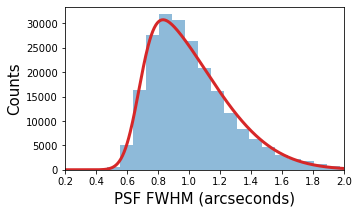

s =  5.262596080326635
mean =  0.6794844689053509
sigma =  0.4241130397126625
 
r -band:


/Users/nikki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: InitialParamWarning: errordef is not given, defaults to 1.


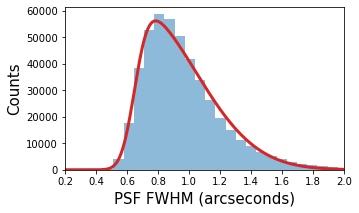

/Users/nikki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: InitialParamWarning: errordef is not given, defaults to 1.


s =  5.643769423032395
mean =  0.649161184781313
sigma =  0.39226890311750956
 
i -band:


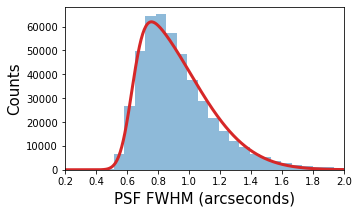

s =  5.908049102440348
mean =  0.6320667065843005
sigma =  0.3724905409764969
 
z -band:


/Users/nikki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: InitialParamWarning: errordef is not given, defaults to 1.


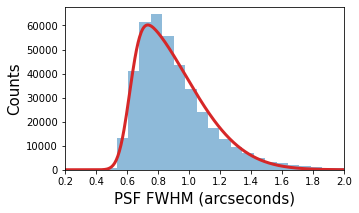

s =  6.245552356730743
mean =  0.6174510825992549
sigma =  0.3587311687138519
 
y -band:


/Users/nikki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: InitialParamWarning: errordef is not given, defaults to 1.


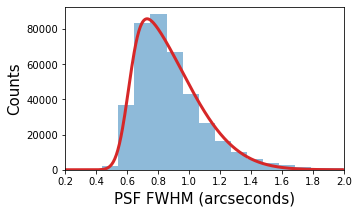

s =  5.567226832362093
mean =  0.611050467273634
sigma =  0.33862457368566107
 


In [42]:
s_list, mean_list, sigma_list = [], [], []

for band in bands:
    print(band,"-band:")
    s, mean, sigma = fit_seeing(seeing[band])
    print("s = ", s)
    print("mean = ", mean)
    print("sigma = ", sigma)
    print(" ")
    s_list.append(s)
    mean_list.append(mean)
    sigma_list.append(sigma)

## Comparison between previous seeing distribution and new one for i-band

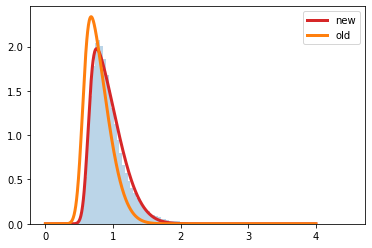

In [29]:
x_range = np.linspace(0, 4, 1000)

plt.figure()
plt.hist(seeing['i'], bins=100, alpha=0.3, density=True)
plt.plot(x_range, stats.skewnorm.pdf(x_range, 5.908049102440348, 0.6320667065843005, 0.3724905409764969), color="C3", lw=3, label="new")
plt.plot(x_range, stats.skewnorm.pdf(x_range, 4.049000982433987, 0.5520909847811348, 0.2987801116294279), color="C1", lw=3, label="old")
plt.legend()

## Figure with all seeing distributions together

(0.2, 2.0)

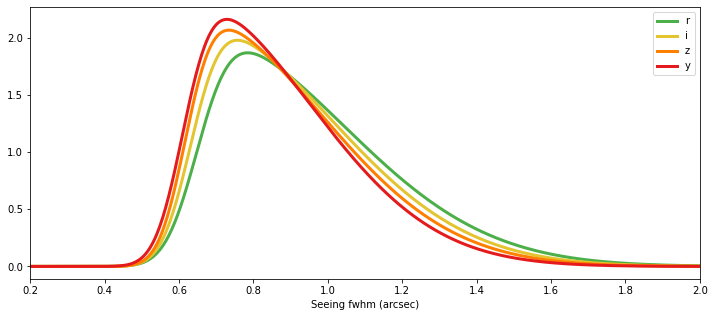

In [43]:
colours = ['#4daf4a', '#e3c530', '#ff7f00', '#e41a1c']

fig, ax = plt.subplots(1, 1, figsize=(12,5))

for band in range(4):
    #sns.kdeplot(seeing[bands[band+1]], ax=ax, lw=3, color=colours[band], fill=False, label=bands[band+1], bw_adjust=5)
    plt.plot(x_range, stats.skewnorm.pdf(x_range, s_list[band+1], mean_list[band+1], sigma_list[band+1]), 
             color=colours[band], lw=3, label=bands[band+1])
    
ax.legend()
ax.set_xlabel("Seeing fwhm (arcsec)")
plt.xlim(0.2, 2)

In [47]:
for band in bands:
    print(band,"-band")
    print("median:", np.around(np.median(seeing[band]), 3))
    print("mean:", np.around(np.mean(seeing[band]), 3))
    print(" ")

g -band
median: 0.963
mean: 1.022
 
r -band
median: 0.912
mean: 0.971
 
i -band
median: 0.879
mean: 0.939
 
z -band
median: 0.853
mean: 0.914
 
y -band
median: 0.836
mean: 0.891
 
